# Week One Task-1 Exploratory Data Analysis (EDA)

# Imports from Modules

In [1]:
import os
import sys

# Get the current working directory (notebooks folder)
notebooks_dir = os.getcwd()

# Construct the path to the scripts folder
scripts_path = os.path.join(notebooks_dir, '..', 'scripts')

# Add the scripts folder to the system path
sys.path.append(scripts_path)

In [2]:
from importlib import reload
import analysis, data_visualization
reload(analysis)
reload(data_visualization)

<module 'data_visualization' from 'c:\\ML and DS Files\\Kifiya AI\\Kaim-week-1\\notebooks\\..\\scripts\\data_visualization.py'>

In [3]:
import imports
from data_loader import load_csv_data
from analysis import  check_missing_value, headline_length_check,count_and_sort, convert_date, extract_date, perform_sentiment_analysis
from data_visualization import plot_univarate, plot_trends

In [4]:
file_path = r"C:\ML and DS Files\Kifiya AI\Kaim-week-1\week 1 data\Data\raw_analyst_ratings\raw_analyst_ratings.csv"
data = load_csv_data (file_path)
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


# 1. Data Check and Cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [6]:
# check for missing values
check_missing_value(data)

Missing Value Summary


Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

# 2. Descriptive Statistics:

### 2.1 Obtain basic statistics for textual lengths (like headline length).

In [7]:
headline_length_check(data, 'headline')

Headline Length Statistics


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

In [8]:
data.head(2)

,Unnamed: 0,headline,url,publisher,date,stock,headline_length
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42


### 2.2 Plot Headline length in histogram

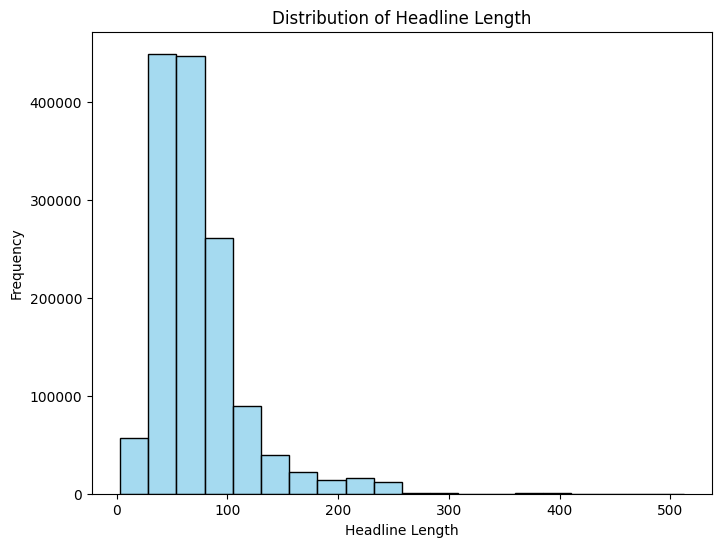

In [9]:
plot_univarate(data, 'headline_length', 'Distribution of Headline Length', 'Headline Length', figsize=(8,6))

### 2.3 Count the number of articles per publisher to identify which publishers are most active.


In [10]:
count_and_sort(data, 'publisher')

publisher
Stock Market Newz                    1
Miri Segal                           1
mjintertrader                        1
adam@eosdetroit.io                   1
Scout Finance Editorial Team         1
                                 ...  
Monica Gerson                    82380
Charles Gross                    96732
Benzinga Newsdesk               150484
Lisa Levin                      186979
Paul Quintaro                   228373
Name: count, Length: 1034, dtype: int64

### 2.4 Analyze the publication dates to see trends over time, such as increased news frequency on particular days or during specific events.

####  2.4.1 preprocess the data to ensure both date formats are correctly parsed into a unified datetime column.

In [11]:
convert_date(data, 'date')

,Unnamed: 0,headline,url,publisher,date,stock,headline_length
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,39
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,42
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,29
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,44
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,87
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 15:23:25+00:00,A,71
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 13:36:20+00:00,A,73
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 13:07:04+00:00,A,120
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 12:37:59+00:00,A,84
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 12:06:17+00:00,A,42


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype              
---  ------           --------------    -----              
 0   Unnamed: 0       1407328 non-null  int64              
 1   headline         1407328 non-null  object             
 2   url              1407328 non-null  object             
 3   publisher        1407328 non-null  object             
 4   date             1407328 non-null  datetime64[ns, UTC]
 5   stock            1407328 non-null  object             
 6   headline_length  1407328 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(2), object(4)
memory usage: 75.2+ MB


#### 2.4.2 Extract time features, Analyze trends over time, Count articles by day, Count articles by year and month....

In [13]:
extract_date(data, 'date')

,date,year,month,day,day_of_week
0,2020-06-05 14:30:54+00:00,2020,6,5,Friday
1,2020-06-03 14:45:20+00:00,2020,6,3,Wednesday
2,2020-05-26 08:30:07+00:00,2020,5,26,Tuesday
3,2020-05-22 16:45:06+00:00,2020,5,22,Friday
4,2020-05-22 15:38:59+00:00,2020,5,22,Friday


In [14]:
data.head(2)

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,year,month,day,day_of_week
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,39,2020,6,5,Friday
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,42,2020,6,3,Wednesday


In [15]:
# Analyze trends over time
# Count articles by day
daily_counts = data.groupby('date').size()

# Count articles by month
monthly_counts = data.groupby(['year', 'month']).size()

# Count articles by year
yearly_count = data.groupby(['year']).size()

# Count articles by day of the week
weekday_counts = data['day_of_week'].value_counts()


**Visualizations**

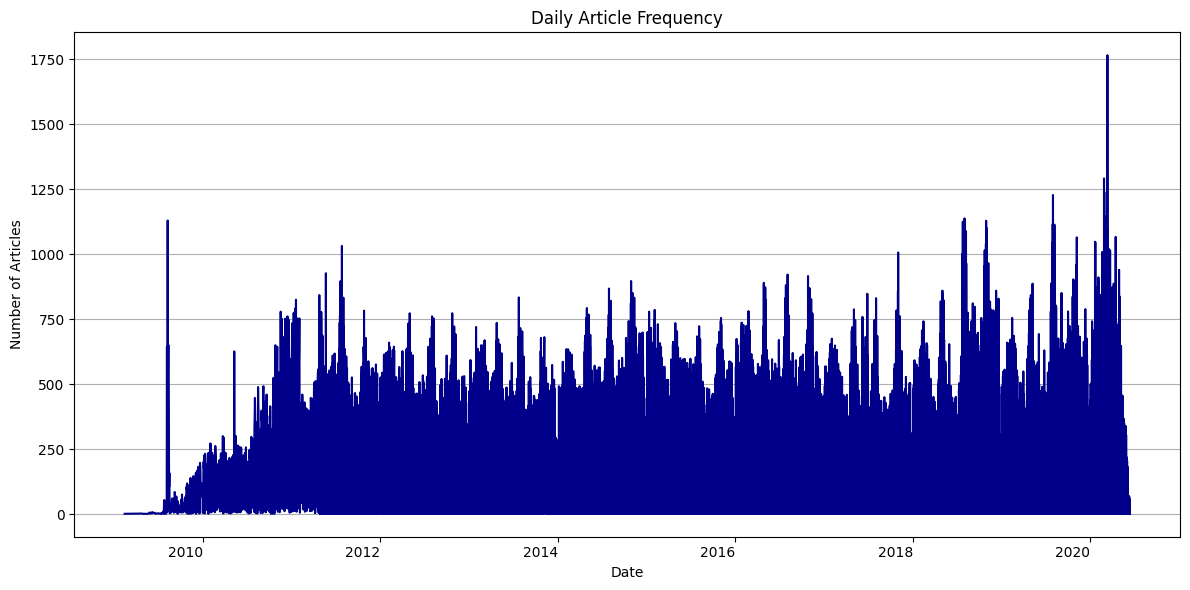

In [16]:
# Daily Trend
plot_trends(
    data=daily_counts,
    title="Daily Article Frequency",
    x_label="Date",
    y_label="Number of Articles",
    plot_type='line',
    figsize=(12, 6),
    color='darkblue'
)

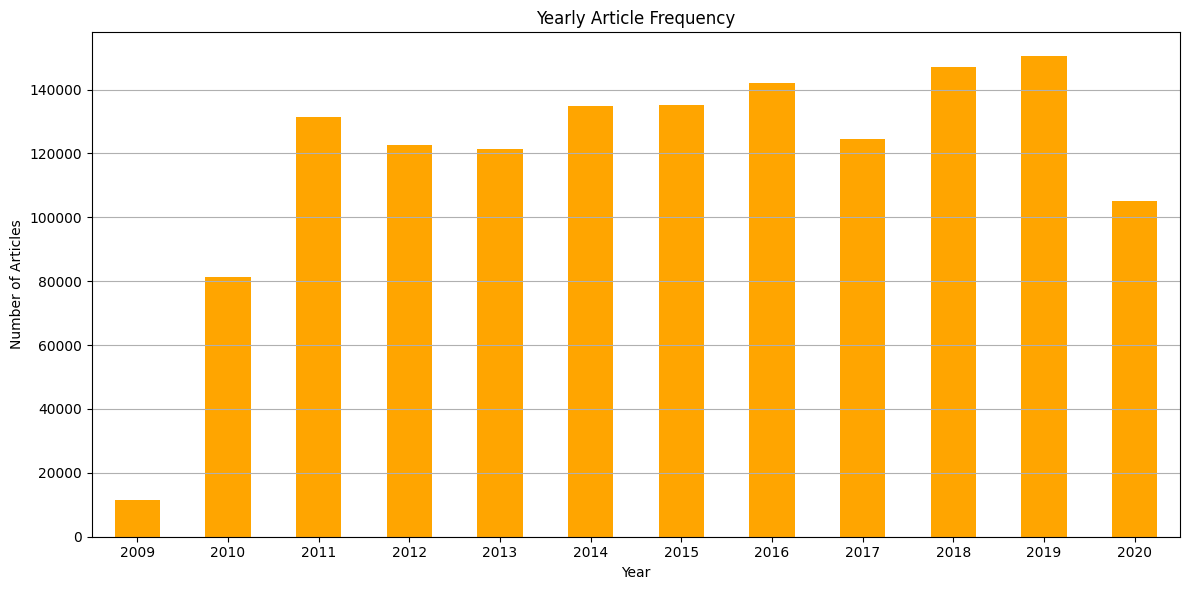

In [17]:
# Yearly trends
plot_trends(
    data=yearly_count,
    title="Yearly Article Frequency",
    x_label="Year",
    y_label="Number of Articles",
    plot_type='bar',
    figsize=(12, 6),
    color='orange'
)


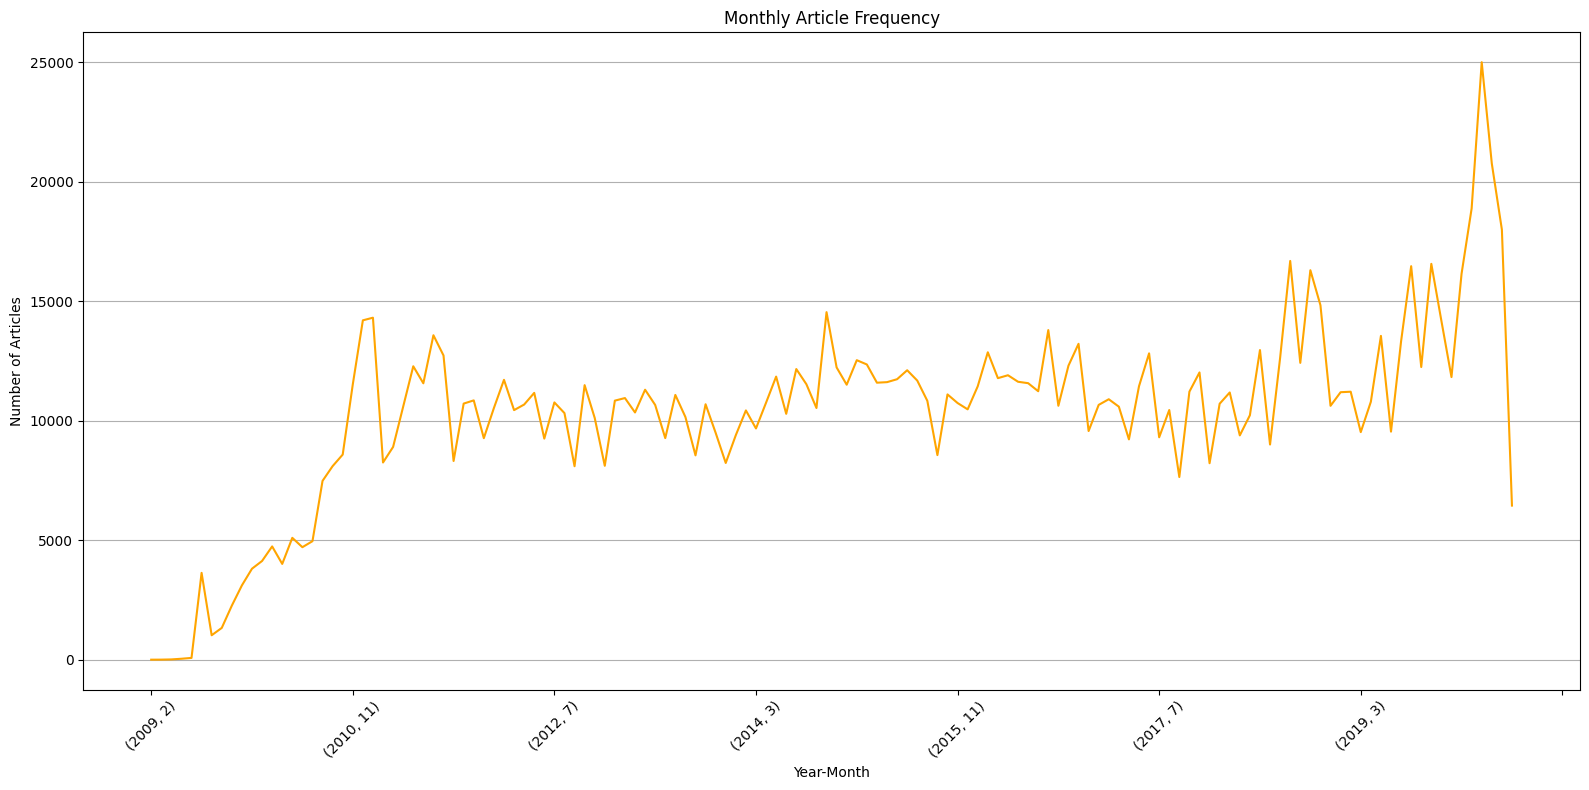

In [18]:
# Monthly Triend
plot_trends(
    data=monthly_counts,
    title="Monthly Article Frequency",
    x_label="Year-Month",
    y_label="Number of Articles",
    plot_type='line',
    figsize=(16, 8),
    color='orange',
    xticks_rotation=45
)

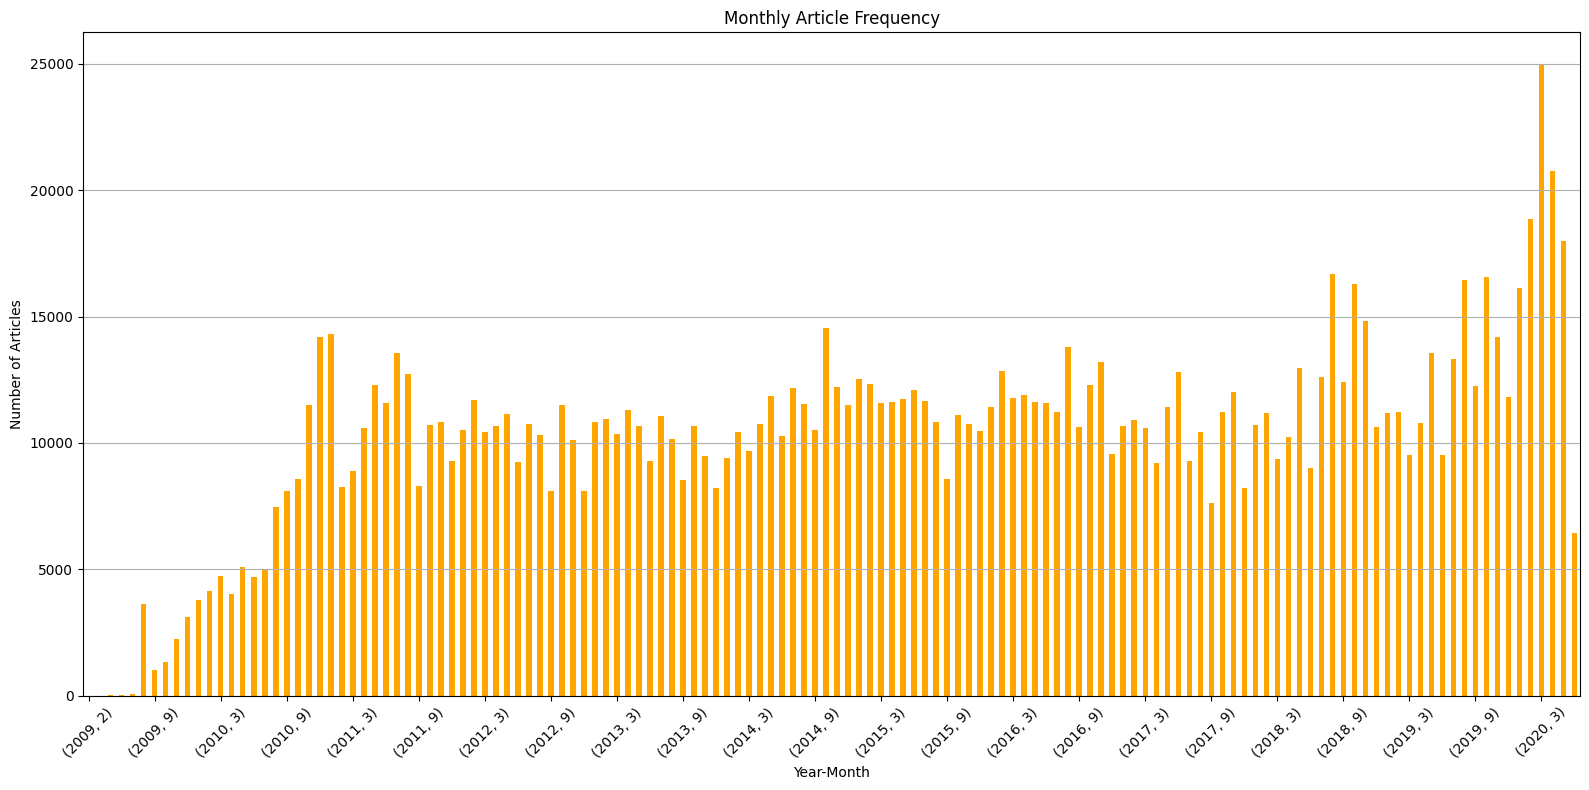

In [19]:
# Bar plot with reduced x-axis labels
plot_trends(
    data=monthly_counts,
    title="Monthly Article Frequency",
    x_label="Year-Month",
    y_label="Number of Articles",
    plot_type='bar',
    figsize=(16, 8),
    color='orange',
    xticks_rotation=45,
    reduce_xticks=True,
    xticks_step=6  # Show every 6th label
)


# 3 Text Analysis(Sentiment analysis & Topic Modeling)

In [ ]:
data_with_sentiment = perform_sentiment_analysis(data, text_column='headline')

# View a sample of the results
print(data_with_sentiment[['headline', 'compound', 'sentiment_label']].head())

KeyError: "['headlines'] not in index"